# Table of Contents
* [1. Representing Periodic Functions as a Fourier Series](#1.-Representing-Periodic-Functions-as-a-Fourier-Series)
    * [1.1 Introduction to Fourier Series](#1.1-Introduction-to-Fourier-Series)
	* [1.2 Fourier Series for a Square Function](#1.2-Fourier-Series-for-a-Square-Function)
	* [1.3 Fourier Series for Data Sets](#1.3-Fourier-Series-for-Data-Sets)
        

# 1.  Representing Periodic Functions as a Fourier Series

## 1.1 Introduction to Fourier Series

In the late 1700's and early 1800's,a man named Jean-Baptiste Joseph Fourier started to play around with a relativly new  mathmatical anlysis. During this time Fourier was the first to state that all functions can be represented with sinusoidal waves however, this was not widley accepted and he could not prove that the series of waves would always converge onto the function. It wasn't until other mathematician expanded on FOuriers work that it was widley accepted. 
 
A Fourier Series is an infinte sum of sine and cosine waves. This linear combination of sinusoidal waves can be used to demonstrate different periodic function. According to R.J. Beerends in Fourier and Laplace Transformations, the Fourier Series of a function is given by:

$$f(x)=\frac{a_0}{2}+\sum_{n=1}^{\infty}(a_n\cos(nx)+b_n\sin(nx)$$

Where a_0, a_n and b_n are Fourier Coefficients obtained by:

$$ a_0=\frac{2}{T}\int\limits_\frac{-T}{2}^\frac{T}{2} f(x)dx$$
$$ a_n=\frac{2}{T}\int\limits_\frac{-T}{2}^\frac{T}{2}f(x)\cos(nx)dx$$
$$ b_n=\frac{2}{T}\int\limits_\frac{-T}{2}^\frac{T}{2} f(x)\sin(nx)dx$$

Here T is used to represent the period of of the function f(x). 



## 1.2 Fourier Series for a Square Function

To show how a fourier series can be used to represent a periodic function, I'll be using a square wave function and use a fourier series to imitate the function curves.    

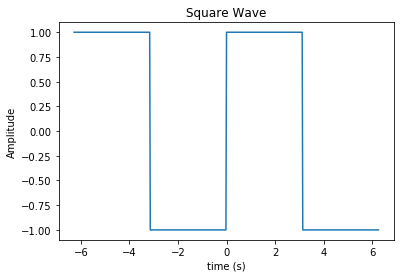

In [173]:
import numpy as np #Imports packages to use later
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import scipy.integrate as integrate




t = np.linspace(-2*np.pi,2*np.pi , 500, endpoint=False)#Gives an array of even spaced numbers
Func=signal.square(t)#Creates a square wave out of data points t



plt.plot(t,Func)##plot of square wave

plt.title('Square Wave')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

The Square wave function above is periodical,meaning the function repeats itself, and has a period of $2\pi$. If we lay a simple sine wave that shares the same period as the square wave, it is easy to see that they share a general shape. 

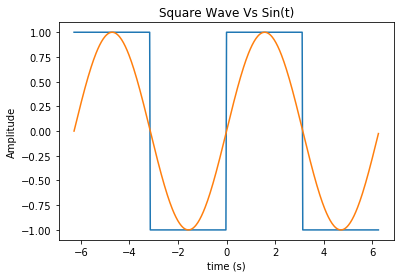

In [168]:
wave=np.sin(t)##I use 1 here because omega is equal to 2Pi/period and our period is 2Pi. 





plt.plot(t,Func)
plt.plot(t,wave)
plt.title('Square Wave Vs Sin(t)')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()



Even though this sine curve is does not correspond exactly to the square wave, It helps get the idea across how a sine function could be used to fit the square wave. 

Now, We will use the equation from Mathworld.Wolfram.com to get a better fit to the square wave. The equation given by: $$f(x)=\frac{4}{\pi}+\sum_{n=1,3,5}^{\infty}\frac{1}{n}\sin(n\omega x)$$

where n is always an odd number and $\omega = \frac{2pi}{T}$. Since our Period is equal to $2\pi$ that means our omega is equal to one. 




To get a better Idea of how the plot of our fourier series becomes closer to the actual square wave function as n increases, I've set up a loop that shows the plot as n approaches a certain inputed number F. 


In [181]:
F=100 #the final value that n approaches

If you change the input of F above and run the cell above this and below this you'll be able to see the plot of the fourier series. 

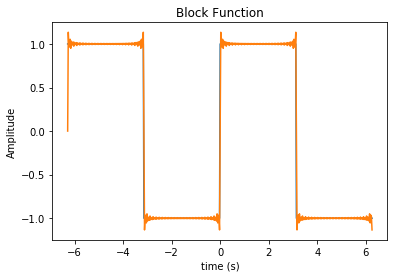

In [182]:


Waves=1/2
n=1
while n<F:## n less than 20 controls what n goes to
    Waves=Waves+(4/(n*np.pi))*np.sin(n*t)##this adds the next sin function onto the sum of the others
    n=n+2
    
        
FinalWave=Waves#final end fournier series
    

#wave1=(4/np.pi)*np.sin(t)##I use 2 here because omega is equal to 2Pi/period and our period is Pi. 
#wave4=(1/2)+(4/np.pi)*np.sin(t)+(4/(3*np.pi))*np.sin(3*t)+(4/(5*np.pi))*np.sin(5*t)+(4/(7*np.pi))*np.sin(7*np.pi)+(4/(9*np.pi))*np.sin(9*np.pi)
plt.plot(t,Func)
#plt.plot(t,wave1)
#plt.plot(t,wave4)
plt.plot(t,FinalWave)
plt.title('Block Function')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()


As you could can see that as N approaches a higher number and more terms are added to the Fourier Series the closer it becomes to fitting the square wave function. 

## 1.3 Fourier Series for Data Sets


Now we will go over how to use a fourier series to fit an arbitrary data set. In this example, I will use a data set that represents Volts as a function of time.

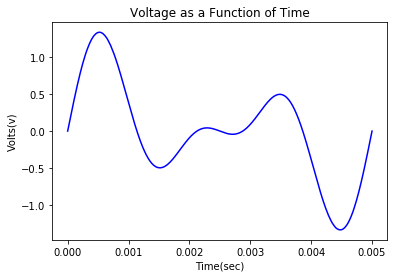

In [174]:
DataSet=pd.read_table('dataset.txt')
Time=DataSet['t (s)']
Volts=DataSet['V (volts)']

plt.figure()
plt.title('Voltage as a Function of Time')
plt.xlabel('Time(sec)')

plt.ylabel('Volts(v)')
plt.plot(Time,Volts,'b-')
plt.show()



The Function that represents this data set is:
$$V(t)=a_1\sin(\omega t)+a_2\sin(2\omega t)+a_3\sin(3\omega t)+a_4\sin(4\omega t)$$ 

It can be observed that this function consists of various sine functions, Since a Fourier Series is a sum of sinusoidal Functions we know that this in fact is a Fourier Series. So we can find a line of best fit to fit our data and give us the right constants to get the exact Fourier Series of this data.

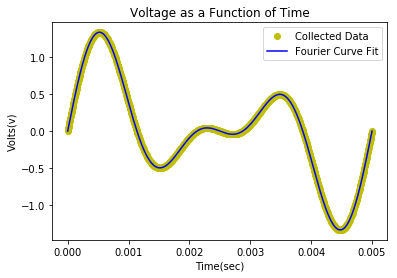

a1=0.250, a2=0.750, a3=0.500, a4=-0.00002, omega=1256.628


In [178]:
from scipy.optimize import curve_fit


p0=[1,1,1,1,2*np.pi/.005]##Guess at parameters that fit a_1,a_2,a_3,a-4, Since we know the data is periodic its safe to say .005s is one period. w=2Pi/T
def Function(t,a_1,a_2,a_3,a_4,w):
    return a_1*np.sin(w*t)+a_2*np.sin(2*w*t)+a_3*np.sin(3*w*t)+a_4*np.sin(4*w*t)

parameters, stats=curve_fit(Function,Time,Volts,p0)

Fourier=Function(Time,*parameters)


plt.figure()
plt.title('Voltage as a Function of Time')
plt.xlabel('Time(sec)')

plt.ylabel('Volts(v)')
plt.plot(Time,Volts,'yo')
plt.plot(Time,Fourier,'b-')
L=plt.legend()
L.get_texts()[0].set_text('Collected Data')
L.get_texts()[1].set_text('Fourier Curve Fit')
plt.show()

print('a1=%.3f, a2=%.3f, a3=%.3f, a4=%.5f, omega=%.3f'%(parameters[0],parameters[1],parameters[2],parameters[3],parameters[4]))


As you can see from the graph above, the four terms in the Fourier Series was enough to form almost a complete match of the periodic data. By using a Curve fit, we are able to find the parameters that fit our unkown constants instead of deriving all of the constants.  


Our final Fourier Series equation for this data set is:
$$V(t)=0.25\sin(\omega t)+0.75\sin(2*1256.63 t)+0.5\sin(3*1256.63 t)+0.00002\sin(4*1256.63 t)$$ 


From this it can be seen that a fourier series can indeed be a useful way to represent a periodical function.

# References


Beerends, R. J. Fourier and Laplace Transforms. Cambridge University Press, 2003. EBSCOhost.

Weisstein, Eric W. "Fourier Series--Square Wave." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/FourierSeriesSquareWave.html